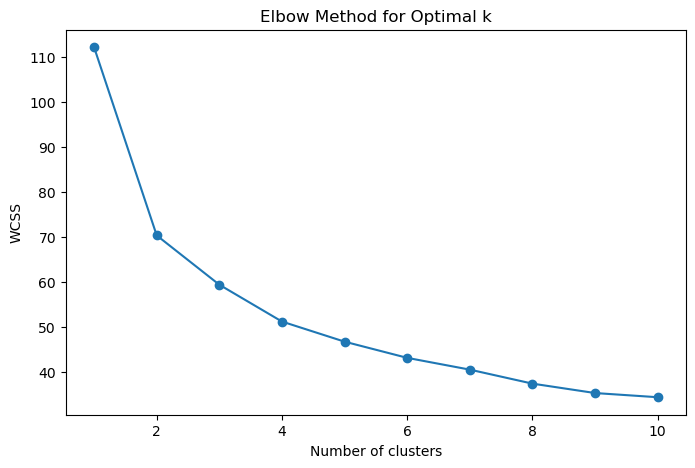

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


df = pd.read_csv('nba_2022_2023.csv')


features = ['PTS', 'AST', 'TRB', 'STL', 'BLK', 'FG%', '3P%']
df_selected = df[features]
df_selected = df_selected.fillna(df_selected.mean())


scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_selected)


wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('elbow_plot.png')
plt.show()

In [44]:
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_data)
df['Cluster'] = clusters

for cluster_num in range(4):
    print(f"\nCluster {cluster_num} example players:")
    print(df[df['Cluster'] == cluster_num][['Player', 'PTS', 'AST', 'TRB', 'STL', 'BLK', 'FG%', '3P%']].head(3))


Cluster 0 example players:
             Player   PTS  AST   TRB  STL  BLK    FG%    3P%
0  Precious Achiuwa   9.2  0.9   6.0  0.6  0.5  0.485  0.269
1      Steven Adams   8.6  2.3  11.5  0.9  1.1  0.597  0.000
2       Bam Adebayo  20.4  3.2   9.2  1.2  0.8  0.540  0.083

Cluster 1 example players:
           Player   PTS  AST  TRB  STL  BLK    FG%    3P%
4    Santi Aldama   9.0  1.3  4.8  0.6  0.6  0.470  0.353
8   Grayson Allen  10.4  2.3  3.3  0.9  0.2  0.440  0.399
10  Jose Alvarado   9.0  3.0  2.3  1.1  0.2  0.411  0.336

Cluster 2 example players:
                     Player  PTS  AST  TRB  STL  BLK    FG%    3P%
3              Ochai Agbaji  7.9  1.1  2.1  0.3  0.3  0.427  0.355
5  Nickeil Alexander-Walker  6.2  1.8  1.7  0.5  0.4  0.444  0.384
6  Nickeil Alexander-Walker  6.3  2.1  1.6  0.7  0.4  0.488  0.402

Cluster 3 example players:
                   Player   PTS  AST   TRB  STL  BLK    FG%    3P%
12  Giannis Antetokounmpo  31.1  5.7  11.8  0.8  0.8  0.553  0.275
24        